# 1. 数据预处理
导入数据并做相关转换

In [1]:
import matplotlib.pyplot as plt  # import matplotlib library
import numpy as np      #导入numpy库
import pandas as pd     #导入pandas库
from sklearn.datasets import load_boston  #从sklearn数据集库导入boston数据
boston=load_boston()    #从读取的房价数据存储在boston变量中
print(boston.keys())    #打印boston包含元素
print(boston.feature_names)   #打印boston变量名

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


在波士顿房屋价格数据集中，data即为特征变量，target为目标变量，选取data中的RM、target中的MEDV变量进行单变量线性回归。

In [2]:
# data特征变量的前五行数据
bos = pd.DataFrame(boston.data)  #将data转换为DataFrame格式以方便展示
print (bos[5].head())   #data的第6列数据为RM
# 把target打印出来
bos_target = pd.DataFrame(boston.target)    #将target转换为DataFrame格式以方便展示
print(bos_target.head())

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: 5, dtype: float64
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


绘制房屋价格（MEDV）、每个房屋的房间数量（RM）的散点图。

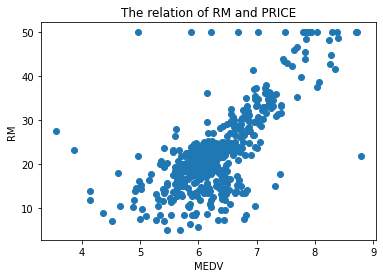

In [3]:
# 绘制房屋价格（MEDV）、每个房屋的房间数量（RM）的散点图
X = bos.iloc[:,5:6]  #选取data中的RM变量
y = bos_target       #设定target为y
plt.scatter(X, y)    #绘制散点图
plt.xlabel(u'MEDV')  #x轴标签
plt.ylabel(u'RM')    #y轴标签
plt.title(u'The relation of RM and PRICE') #标题
plt.show()

# 2. 数据集划分：
数据集的划分可以采用Scikit-learn库中的model-selection程序包来实现。

In [4]:
# 数据集划分
from sklearn.model_selection import train_test_split  #导入数据划分包 
# 把X、y转化为数组形式，以便于计算
X = np.array(X.values)  
y = np.array(y.values) 
# 以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((379, 1), (127, 1), (379, 1), (127, 1))

# 3. 训练模型

In [5]:
from sklearn.linear_model import LinearRegression  #使用LinearRegression库
lr=LinearRegression()   #设定回归算法
lr.fit(X_train,y_train) #使用训练数据进行参数求解
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ('求解截距项为：',lr.intercept_)  #打印截距的值
print ('求解系数为：',lr.coef_)         #打印权重向量的值


求解截距项为： [-31.08119255]
求解系数为： [[8.56021067]]


# 4. 模型预测
基于对参数的求解结果，对测试集进行预测。

In [6]:
y_hat = lr.predict(X_test) #对测试集的预测
y_hat[0:9]  #打印前10个预测值

array([[34.7553877 ],
       [19.07308176],
       [25.90412987],
       [15.59763622],
       [39.67750884],
       [18.42250575],
       [15.1781859 ],
       [21.39289885],
       [25.37339681]])

# 5. 模型评估
对拟合与预测结果进行效果评价，以判断求解结果是否良好。#y_test与y_hat的可视化

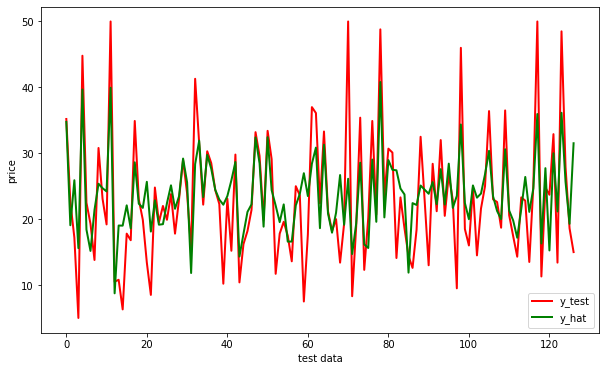

In [7]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(X_test))  #创建t变量
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') #绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat')   #绘制y_hat曲线
plt.legend() #设置图例
plt.xlabel('test data')
plt.ylabel('price')
plt.show()

图形显示，测试集中房屋价格（MEDV）的预测值基本较好地拟合了真实值y_test的变化趋势。

r2: 0.5579593797595812
r2_score: 0.5579593797595812
MAE: 4.532022675505139
MSE: 40.588864781173335
RMSE: 6.37093908157764


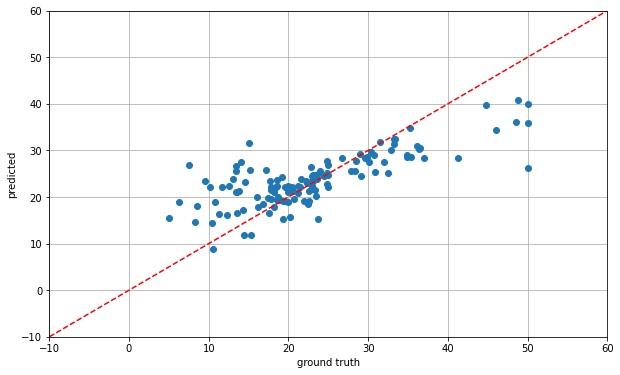

In [8]:
plt.figure(figsize=(10,6))   #绘制图片尺寸
plt.plot(y_test,y_hat,'o')   #绘制散点
plt.plot([-10,60],[-10,60], color="red", linestyle="--", linewidth=1.5) 
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')   #设置X轴坐标轴标签
plt.ylabel('predicted')      #设置y轴坐标轴标签
plt.grid()  #绘制网格线

from sklearn import metrics
from sklearn.metrics import r2_score
# 拟合优度R2的输出方法一
print ("r2:",lr.score(X_test, y_test))  #基于Linear-Regression()的回归算法得分函数，来对预测集的拟合优度进行评价
# 拟合优度R2的输出方法二
print ("r2_score:",r2_score(y_test, y_hat)) #使用metrics的r2_score来对预测集的拟合优度进行评价
# 用scikit-learn计算MAE
print ("MAE:", metrics.mean_absolute_error(y_test, y_hat)) #计算平均绝对误差
# 用scikit-learn计算MSE
print ("MSE:", metrics.mean_squared_error(y_test, y_hat))  #计算均方误差
# # 用scikit-learn计算RMSE
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat))) #计算均方根误差